In [10]:
from langgraph.prebuilt import create_react_agent
from langgraph.store.memory import InMemoryStore
from langmem import create_manage_memory_tool, create_search_memory_tool
from langchain_core.messages import HumanMessage
from rich.pretty import Pretty

In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
store = InMemoryStore(
    index={
        "dims": 1536,
        "embed": "openai:text-embedding-3-small",
    }
)

In [ ]:
agent = create_react_agent(
    model="openai:gpt-4o-mini",
    tools=[
        # Memory tools use LangGraph's BaseStore for persistence
        create_manage_memory_tool(namespace=("memories",)),
        create_search_memory_tool(namespace=("memories",)),
    ],
    store=store,
)

/tmp/ipykernel_14205/980953154.py:1: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(


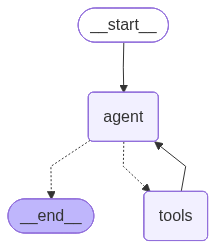

In [8]:
agent

In [11]:
Pretty(agent.get_input_jsonschema())

{
    '$defs': {
        'BaseMessage': {
            'additionalProperties': True,
            'description': 'Base abstract message class.\n\nMessages are the inputs and outputs of 
``ChatModel``s.',
            'properties': {
                'content': {
                    'anyOf': [
                        {'type': 'string'},
                        {
                            'items': {
                                'anyOf': [{'type': 'string'}, {'additionalProperties': True, 'type': 'object'}]
                            },
                            'type': 'array'
                        }
                    ],
                    'title': 'Content'
                },
                'additional_kwargs': {
                    'additionalProperties': True,
                    'title': 'Additional Kwargs',
                    'type': 'object'
                },
                'response_metadata': {
                    'additionalProperties': True,
                    'title': 'Response Metadata',
                    'type': 'object'
                },
                'type': {'title': 'Type', 'type': 'string'},
                'name': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'title': 'Name'},
                'id': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'default': None, 'title': 'Id'}
            },
            'required': ['content', 'type'],
            'title': 'BaseMessage',
            'type': 'object'
        }
    },
    'deprecated': True,
    'description': 'The state of the agent.',
    'properties': {
        'messages': {'items': {'$ref': '#/$defs/BaseMessage'}, 'title': 'Messages', 'type': 'array'},
        'remaining_steps': {'title': 'Remaining Steps', 'type': 'integer'}
    },
    'required': ['messages'],
    'title': 'AgentState',
    'type': 'object'
}

In [12]:
# Ask a random question to the agent
output = agent.invoke(
    input = {
        "messages": [
            {
                "role": "user", 
                "content": "What are my lighting preferences?"
            }
        ]
    },
    config = {"configurable": {"thread_id": "1"}}
)

output['messages']

[HumanMessage(content='What are my lighting preferences?', additional_kwargs={}, response_metadata={}, id='c5c09bb0-422c-4a50-8edf-3bfc0902b33a'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_JWonJ6zJuBcpDQh16KrsdZac', 'function': {'arguments': '{"query":"lighting preferences"}', 'name': 'search_memory'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 244, 'total_tokens': 259, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-CklPiuAC8Lkr4Ra4kBI7HBX21g8hZ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd115f38-a839-41d9-93a0-47a02791e04f-0', tool_calls=[{'name': 'search_memory', 'args': {'query': 'lighting

In [13]:
messages = output['messages']

In [14]:
messages.append(HumanMessage("Ok. Remember that I prefer dark mode."))

In [15]:
# Store a new memory in one Session
output = agent.invoke(
    input = {
        "messages": messages,
    },
    config = {"configurable": {"thread_id": "1"}}
)

output['messages']

[HumanMessage(content='What are my lighting preferences?', additional_kwargs={}, response_metadata={}, id='c5c09bb0-422c-4a50-8edf-3bfc0902b33a'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_JWonJ6zJuBcpDQh16KrsdZac', 'function': {'arguments': '{"query":"lighting preferences"}', 'name': 'search_memory'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 244, 'total_tokens': 259, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-CklPiuAC8Lkr4Ra4kBI7HBX21g8hZ', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd115f38-a839-41d9-93a0-47a02791e04f-0', tool_calls=[{'name': 'search_memory', 'args': {'query': 'lighting

In [16]:
# Retrieve the stored memory in another Session
output = agent.invoke(
    {
        "messages": [
            {
                "role": "user", 
                "content": "What are my lighting preferences?"
            }
        ]
    },
    config = {"configurable": {"thread_id": "2"}}
)

output['messages']

[HumanMessage(content='What are my lighting preferences?', additional_kwargs={}, response_metadata={}, id='d0559481-d7bb-4c93-9a80-6677eaa58668'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Lk1oCMYJ40VcjCpmpSWTFnrx', 'function': {'arguments': '{"query":"lighting preferences"}', 'name': 'search_memory'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 244, 'total_tokens': 259, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_aa07c96156', 'id': 'chatcmpl-CklQexMwAIBo14Hp9yZoqGstkUCEy', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--fb01fd62-da55-4458-8682-c6e81e79d3d3-0', tool_calls=[{'name': 'search_memory', 'args': {'query': 'lighting